In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import os
import cv2
import numpy as np
import csv
import glob
from scipy.stats import skew
from scipy.stats import entropy
from scipy.stats import kurtosis
from scipy.stats import moment
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
import os
path = '/content/drive/MyDrive/Image Processing/Piring Plastik'
image_fitur=[]
for file in os.listdir(path):
  imag = cv2.imread(os.path.abspath(path + "/" + file),cv2.IMREAD_COLOR)
  imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
  imag = cv2.cvtColor(imag, cv2.COLOR_RGB2GRAY)

  rata = np.mean(imag)
  vari = np.var(imag)
  stand = np.var(imag)
  skw = skew(skew(imag))
  kurt = kurtosis(kurtosis(imag))
  entro = entropy(entropy(imag))

  fitur = (rata,vari,stand,skw,kurt,entro)
  image_fitur.append(fitur)

dt = pd.DataFrame(image_fitur,columns=['rata','varian','standar','skewness','kurtosis','Entropy',])
dt.to_excel("plastic_plates.xlsx")

/usr/local/lib/python3.8/dist-packages/scipy/stats/_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [ ]:
import os
path = '/content/drive/MyDrive/Image Processing/Sendok'
image_fitur=[]
for file in os.listdir(path):
  imag = cv2.imread(os.path.abspath(path + "/" + file), cv2.IMREAD_COLOR)
  imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
  imag = cv2.cvtColor(imag, cv2.COLOR_RGB2GRAY)

  rata = np.mean(imag)
  vari = np.var(imag)
  stand = np.var(imag)
  skw = skew(skew(imag))
  kurt = kurtosis(kurtosis(imag))
  entro = entropy(entropy(imag))

  fitur = (rata,vari,stand,skw,kurt,entro)
  image_fitur.append(fitur)

dt = pd.DataFrame(image_fitur,columns=['rata','varian','standar','skewness','kurtosis','Entropy',])
dt.to_excel("sendok.xlsx")

In [ ]:
from sklearn.naive_bayes import BernoulliNB

data = pd.read_excel('/content/drive/MyDrive/Image Processing/Label.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   rata        200 non-null    float64
 2   varian      200 non-null    float64
 3   standar     200 non-null    float64
 4   skewness    200 non-null    float64
 5   kurtosis    200 non-null    float64
 6   Entropy     197 non-null    float64
 7   Label       200 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 12.6 KB


0 = piring
1 = sendok

In [ ]:
#handling missing values within the data
data.Entropy.fillna(data.Entropy.mean(), inplace= True)

In [ ]:
data.isna().sum()

Unnamed: 0    0
rata          0
varian        0
standar       0
skewness      0
kurtosis      0
Entropy       0
Label         0
dtype: int64

### Modeling




In [ ]:
#note: labeling dulu di excelnya
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Naive Bayes BernoulliNB

In [ ]:
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

BernoulliNB()

In [ ]:
nb_mod = model_nb.predict(X_test)
nb_mod[:5]

array([0, 0, 0, 0, 0])

In [ ]:
def nb_model(inputs, targets, name=''):
    pred_nb = model_nb.predict(inputs)
    accuracy_nb = accuracy_score(targets,pred_nb)
    print("Accuracy : {:.2f}%".format(accuracy_nb * 100))
    print('Precison : {:.2f}%'.format(precision_score(targets, pred_nb) * 100))
    print('Recall   : {:.2f}%'.format(recall_score(targets, pred_nb) * 100))


    cm = confusion_matrix(targets, pred_nb, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_nb

Accuracy : 55.33%
Precison : 63.16%
Recall   : 31.17%


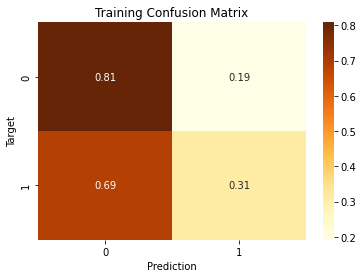

In [ ]:
# Train Naive Bayes Bernoulli
train_nb = nb_model(X_train, y_train, 'Training')

Accuracy : 58.00%
Precison : 60.00%
Recall   : 26.09%


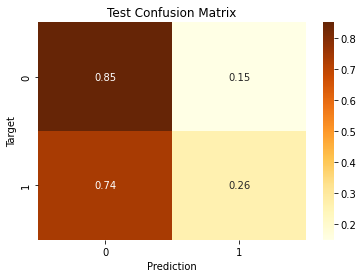

In [ ]:
# Prediksi Naive Bayes
nb_pred = nb_model(X_test, y_test, 'Test')

In [ ]:
# Classification Report
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.57      0.85      0.69        27
           1       0.60      0.26      0.36        23

    accuracy                           0.58        50
   macro avg       0.59      0.56      0.53        50
weighted avg       0.59      0.58      0.54        50



In [ ]:
# MAE
print('MAE Naive Bayes',mean_absolute_error(y_test, nb_pred))

MAE Naive Bayes 0.42


In [ ]:
def roc_curve_nb(y_test, y_pred, nama=''):
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(nama))
    plt.legend(loc="lower right")

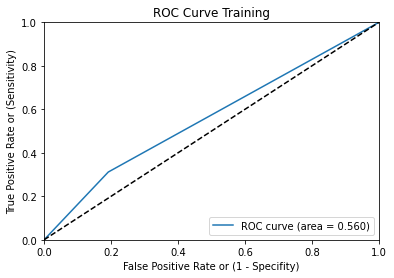

In [ ]:
roc_curve_nb(y_train,train_nb,'Training')

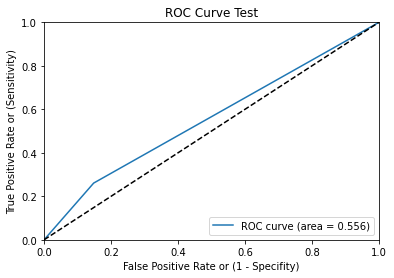

In [ ]:
roc_curve_nb(y_test, nb_pred,'Test')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.50')

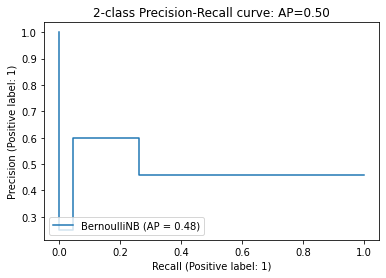

In [ ]:
# Plot Precision Recall
disp = plot_precision_recall_curve(model_nb, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                        'AP={0:0.2f}'.format(average_precision_score(y_test, nb_pred)))

In [ ]:
# Akurasi
print('Akurasi Naive Bayes     : ',accuracy_score(y_test, nb_pred))
# Precision
print('Precision Naive Bayes   : ',precision_score(y_test, nb_pred))
# Recall
print('Recall Naive Bayes      : ',recall_score(y_test, nb_pred))
# F1
print('F1 Naive Bayes          : ',f1_score(y_test, nb_pred))
# MSE
print('MSE Naive Bayes         : ',mean_squared_error(y_test, nb_pred))
# ROC AUC
print('ROC AUC Naive Bayes     : ',roc_auc_score(y_test, nb_pred))

Akurasi Naive Bayes     :  0.58
Precision Naive Bayes   :  0.6
Recall Naive Bayes      :  0.2608695652173913
F1 Naive Bayes          :  0.36363636363636365
MSE Naive Bayes         :  0.42
ROC AUC Naive Bayes     :  0.5563607085346216


## KNN

In [ ]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
def knn_model(inputs, targets, name=''):
    pred_knn = model_knn.predict(inputs)
    accuracy_knn = accuracy_score(targets,pred_knn)
    print("Accuracy     : {:.2f}%".format(accuracy_knn * 100))
    print('Precision    : {:.2f}%'.format(precision_score(targets, pred_knn) * 100))
    print('Recall       : {:.2f}%'.format(recall_score(targets, pred_knn) * 100))

    cm = confusion_matrix(targets, pred_knn, normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='YlOrBr')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return pred_knn

In [ ]:
knn_mod = model_knn.predict(X_test)
knn_mod[:5]

array([0, 0, 0, 1, 0])

Accuracy     : 84.00%
Precision    : 85.33%
Recall       : 83.12%


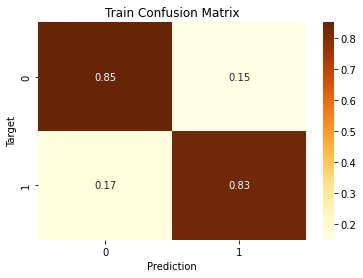

In [ ]:
# Train
knn_train = knn_model(X_train, y_train, name='Train')

Accuracy     : 76.00%
Precision    : 82.35%
Recall       : 60.87%


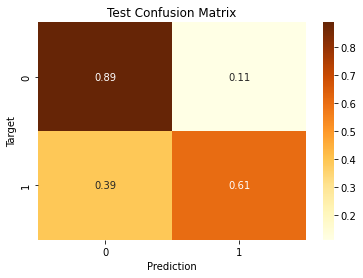

In [ ]:
# Test
knn_pred = knn_model(X_test, y_test, name='Test')

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.82      0.61      0.70        23

    accuracy                           0.76        50
   macro avg       0.78      0.75      0.75        50
weighted avg       0.77      0.76      0.75        50



In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
print('MAE KNN',mean_absolute_error(y_test, knn_pred))

MAE KNN 0.24


In [ ]:
def roc_auc_knn(y_test, y_pred, name=''):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    #plt.title('Receiver Operating Characteristic')
    plt.title('ROC Curve {}'.format(name))
    plt.legend(loc="lower right")

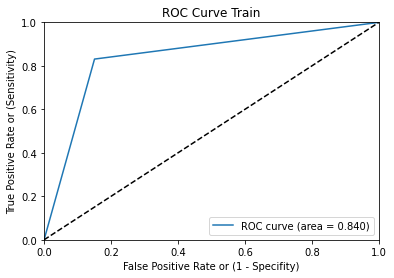

In [ ]:
roc_auc_knn(y_train, knn_train, name='Train')

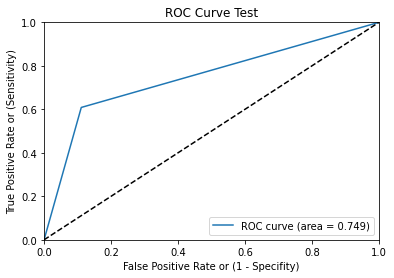

In [ ]:
roc_auc_knn(y_test, knn_pred, name='Test')

In [ ]:
# Akurasi KNN
print('Akurasi KNN      : ',model_knn.score(X_test, y_test))
# Recall KNN
print('Recall KNN       : ',recall_score(y_test, knn_pred))
# Precision KNN
print('Precision KNN    : ',precision_score(y_test, knn_pred))
# F1 KNN
print('F1 KNN           : ',f1_score(y_test, knn_pred))
# MSE
print('MAE KNN          : ', mean_absolute_error(y_test, knn_pred))
# ROC AUC
print('ROC AUC KNN      : ',roc_auc_score(y_test, knn_pred))

Akurasi KNN      :  0.76
Recall KNN       :  0.6086956521739131
Precision KNN    :  0.8235294117647058
F1 KNN           :  0.7
MAE KNN          :  0.24
ROC AUC KNN      :  0.748792270531401


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.68')

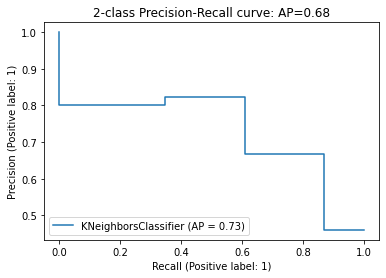

In [ ]:
# Plot Precision Recall
disp = plot_precision_recall_curve(model_knn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                     'AP={0:0.2f}'.format(average_precision_score(y_test, knn_pred)))

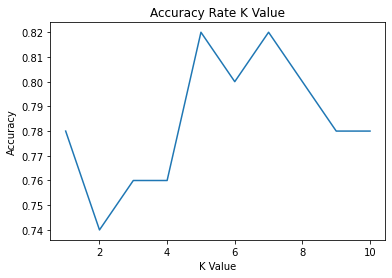

Nilai K terbaik adalah  5
Akurasi sebesar 82 %


In [ ]:
# Mencari nilai K terbaik
from sklearn.model_selection import cross_val_score
accuracies = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))
plt.plot(range(1, 11), accuracies)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()
print("Nilai K terbaik adalah ", accuracies.index(max(accuracies))+1)
print("Akurasi sebesar", round(max(accuracies)*100), "%")